<a href="https://colab.research.google.com/github/nishitjain97/Model-vs-Modalities/blob/main/GDP_Analysis_LSTM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
tf.random.set_seed(7)

In [ ]:
gdp_Data= pd.read_csv('/content/sample_data/etf_data.csv', index_col='datetime').reset_index(drop=True).iloc[:3000]
df = gdp_Data
gdp_Data

,DIA,EEM,QQQ,SPY,VXX
0,249.37,40.39,174.82,276.3500,30.6700
1,249.20,40.38,174.65,276.1300,30.6800
2,249.32,40.40,174.62,276.1700,30.6497
3,249.19,40.37,174.55,275.9768,30.6500
4,248.98,40.37,174.43,275.7800,30.7700
...,...,...,...,...,...
2995,260.80,42.10,183.13,288.6800,28.0300
2996,260.80,42.10,183.13,288.6800,28.0300
2997,260.87,42.12,183.23,288.8000,27.9900
2998,260.88,42.12,183.30,288.8350,27.9800


In [ ]:
normalized_df=(df-df.mean())/df.std()
display(normalized_df)
df = normalized_df

,DIA,EEM,QQQ,SPY,VXX
0,-1.217560,-1.817779,-0.564687,-1.124642,1.631229
1,-1.251895,-1.841522,-0.603657,-1.164535,1.640513
2,-1.227658,-1.794035,-0.610534,-1.157282,1.612384
3,-1.253915,-1.865266,-0.626581,-1.192315,1.612663
4,-1.296329,-1.865266,-0.654090,-1.228001,1.724063
...,...,...,...,...,...
2995,1.090981,2.242342,1.340292,1.111184,-0.819570
2996,1.090981,2.242342,1.340292,1.111184,-0.819570
2997,1.105119,2.289829,1.363216,1.132943,-0.856703
2998,1.107139,2.289829,1.379262,1.139290,-0.865987


In [ ]:
trainX = df
# testX = test.iloc[:]

In [ ]:
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  # print(len(sequence))
  for i in range(len(sequence)):
		# find the end of this pattern
    end_ix = i + n_steps
		# check if we are beyond the sequence
    # print('checkpoint 1')
    if end_ix > len(sequence)-1:
      break
    # print('checkpoint 2')
    # print(i, end_ix)
    # print(sequence[0:3])
		# gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence.iloc[end_ix]
    # print('checkpoint 3')
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
n_steps = 4
models = []
train_predictions = []
test_predictions = []

train_index_begin = 2100
prediction_horizon = 10

final_forecasts = pd.DataFrame()

predictions = {}

for feature in range(7):
  predictions[feature] = []
  for train_end in list(range(train_index_begin, trainX.shape[0], prediction_horizon)):
    train_start = train_end - 150
    test_start = train_end + 1
    test_end = test_start + prediction_horizon

    if test_end >= trainX.shape[0]:
        continue

    train_data = trainX.iloc[train_start:train_end, :]
    test_data = trainX.iloc[test_start - n_steps:test_end, :]

    tX, tY = split_sequence(train_data.iloc[:, feature], n_steps)
    tX = np.expand_dims(tX, axis=1)
    model = Sequential()
    model.add(LSTM(1, input_shape=(1,n_steps)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(tX, tY, epochs=20, batch_size=1, verbose=1)
    models.append(model)
    
    
    # tX, tY = split_sequence(trainX.iloc[:,feature], n_steps)
    tesX, tesY = split_sequence(test_data.iloc[:,feature], n_steps)
    # tX = np.expand_dims(tX, axis=1)
    tesX = np.expand_dims(tesX, axis=1)
    # trainPredict = models[feature].predict(tX)
    testPredict = models[feature].predict(tesX)
    predictions[feature].extend(testPredict)

Epoch 1/20
146/146 [==============================] - 2s 3ms/step - loss: 0.8526
Epoch 2/20
146/146 [==============================] - 0s 3ms/step - loss: 0.5598
Epoch 3/20
146/146 [==============================] - 0s 3ms/step - loss: 0.3337
Epoch 4/20
146/146 [==============================] - 0s 3ms/step - loss: 0.1307
Epoch 5/20
146/146 [==============================] - 0s 3ms/step - loss: 0.0375
Epoch 6/20
146/146 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 7/20
146/146 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 8/20
146/146 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 9/20
146/146 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 10/20
146/146 [==============================] - 0s 3ms/step - loss: 0.0084
Epoch 11/20
146/146 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 12/20
146/146 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 13/20
146/146 [====

In [ ]:
for key in predictions.keys():
  predictions[key] = np.array(predictions[key]).flatten()

NameError: ignored

In [ ]:
final_preds = pd.DataFrame(predictions)

In [ ]:
final_preds.columns = test_data.columns

In [ ]:
gdp_Data

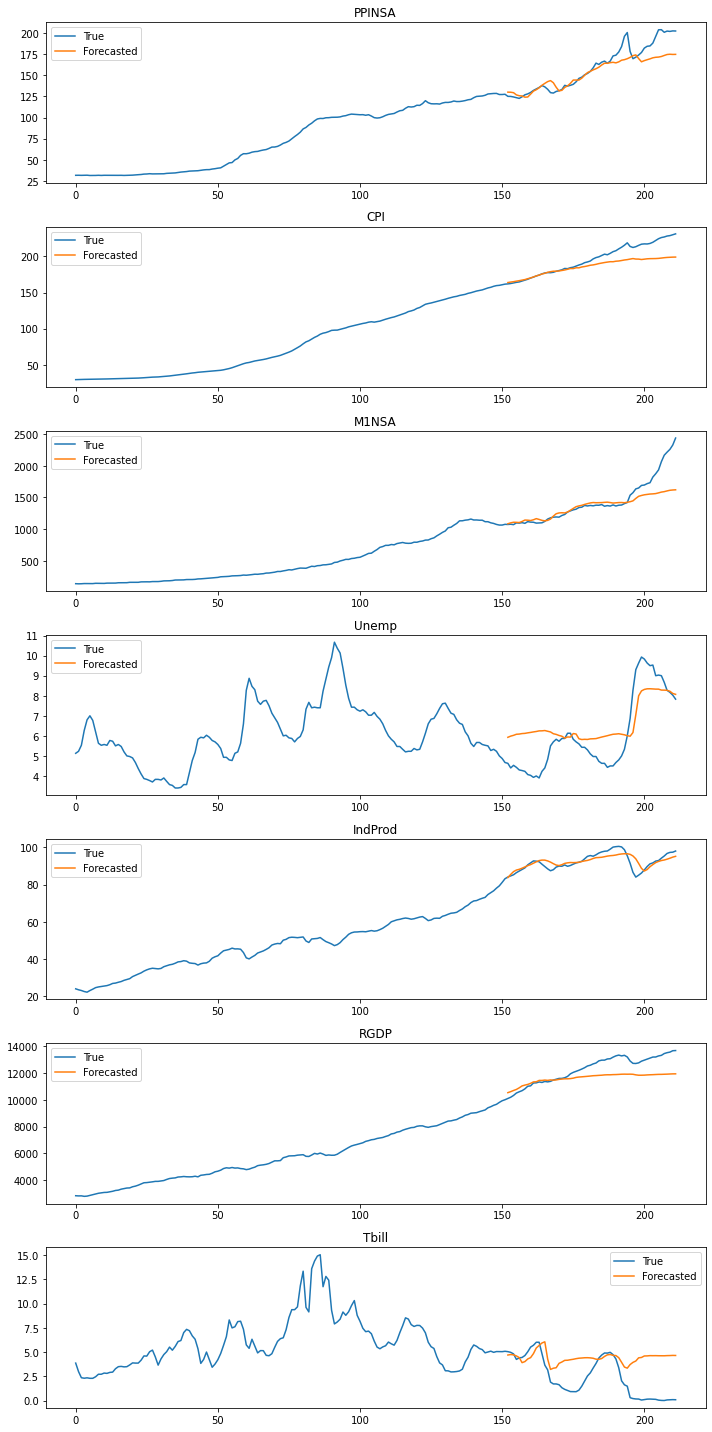

In [ ]:
n_plots = gdp_Data.shape[1]-1

fig, axs = plt.subplots(n_plots, 1, figsize=(10, 20))

for i, column in enumerate(trainX.columns):
    ax = axs[i-1]
    # preds_final = train_predictions[i-1]
    # preds_final = np.append(preds_final, test_predictions[i-1])
    sd = gdp_Data[column].std()
    mu = gdp_Data[column].mean()
    preds_final_x = range(152,212)
    preds_final = final_preds[column]

    ax.plot(trainX[column] * sd + mu)
    ax.plot(preds_final_x, preds_final * sd + mu)
    ax.legend(['True', 'Forecasted'])
    ax.set_title(column)
    
plt.tight_layout()

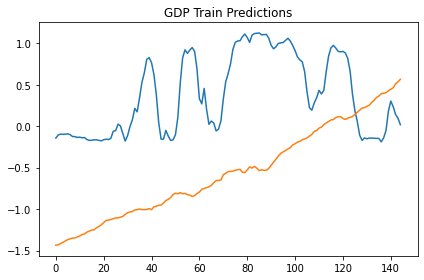

In [ ]:
trainPredictPlot = train_predictions[0]
plt.plot(trainPredictPlot)
plt.plot(tY)
plt.title('GDP Train Predictions')
plt.tight_layout()
plt.show()

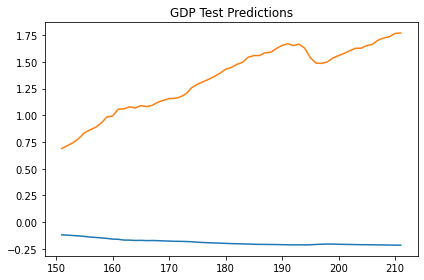

In [ ]:
testPredictPlot = testPredict
plt.plot(range(151,212), testPredictPlot)
plt.plot(range(151,212), tesY)
plt.title('GDP Test Predictions')
plt.tight_layout()
plt.show()